In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/train.csv"
DataWalmart = pd.read_csv(url)

Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but for simplicity we will focus on analyzing one store.

The data includes:
    
    Store - the store number

    Dept - the department number

    Date - the week

    Weekly_Sales - sales for the given department in the given store

    IsHoliday - whether the week is a special holiday week

#### Load the data and set index to Date


In [4]:
DataWalmart['Date'] = pd.to_datetime(DataWalmart['Date'])
DataWalmart.set_index('Date', inplace=True)
DataWalmart['Year'] = DataWalmart.index.year  #If you want to acces Year later or Acces Month later
DataWalmart['Month'] = DataWalmart.index.month
DataWalmart.head(4)

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month
Date,,,,,,
2010-02-05,1,1,24924.50,False,2010,2
2010-02-12,1,1,46039.49,True,2010,2
2010-02-19,1,1,41595.55,False,2010,2
2010-02-26,1,1,19403.54,False,2010,2


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store. Let's call new dataset store1_sales and its variable "Weekly_Sales"


In [5]:
store1_sales = DataWalmart[DataWalmart.Store == 1][['Weekly_Sales']].resample('W', 'sum')
store1_sales.head()

/Users/faryar.ghaemi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


#### Plot the Weekly_Sales. What general trends do you observe?


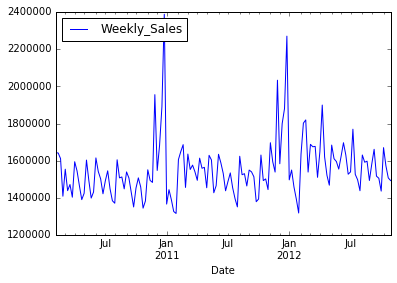

In [6]:
store1_sales[['Weekly_Sales']].plot()

Answer: peaks around christmas

#### Create an autocorrelation plot and explain your findings

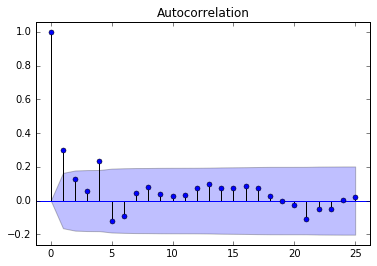

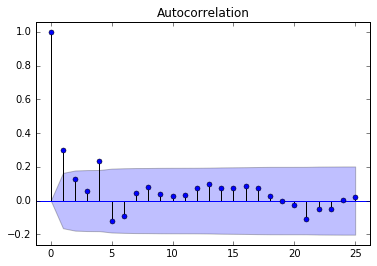

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store1_sales.Weekly_Sales, lags=25)

Answer: not many spikes (not much movement), try an AR model 

#### Split the weekly sales data in a training and test set - using 80% of the data for training. (In this section we use not-so-great Train/Test split method!

In [11]:
n = len(store1_sales.Weekly_Sales)

train = store1_sales.Weekly_Sales[:int(.80*n)]
test = store1_sales.Weekly_Sales[int(.80*n):]

In [12]:
print(test.index[0])
print(test.index[len(test)-1])

2012-04-15 00:00:00
2012-10-28 00:00:00


#### Develope an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [13]:
from statsmodels.tsa.arima_model import ARMA

store1_sales = store1_sales[['Weekly_Sales']].astype(float)
model = ARMA(store1_sales, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(1, 0)   Log Likelihood               -1905.530
Method:                       css-mle   S.D. of innovations         148170.138
Date:                Wed, 03 Aug 2016   AIC                           3817.060
Time:                        17:09:22   BIC                           3825.949
Sample:                    02-07-2010   HQIC                          3820.672
                         - 10-28-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.555e+06   1.77e+04     88.058      0.000      1.52e+06  1.59e+06
ar.L1.Weekly_Sales     0.3005      0.080      3.780      0.000         0.145     0.456
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.3273           +0.0000j            3.3273            0.0000
-----------------------------------------------------------------------------
"""

#### Plot the residuals - where are their significant errors.

Answer: 

#### Compute and AR(2) model and an ARIMA(3, 1,1) model - does this improve your mean absolute error on the held out set.


#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.


Answer: 

# Now, use the correct method and tune your ARIMA model